In [64]:
# Import libraries and dependencies
import pandas as pd
import plotly.express as px
import numpy as np
import scipy.stats as sts
from matplotlib import pyplot as plt

In [65]:
# Read the CSV file into a `DataFrame` and set the date column as the index

stocks_df = pd.read_csv("../Resources/stocks.csv",index_col = "date")
stocks_df = stocks.dropna()
stk_df = stocks_df.set_index(['date'])
stk_df


,JNJ,HD,INTC,AMD,MU,NVDA,TSM
date,,,,,,,
2019-05-14,66.9700,191.62,45.17,27.32,38.51,162.04,41.9700
2019-05-13,66.4900,190.34,44.76,26.24,37.38,158.45,40.9900
2019-05-10,67.2200,194.58,46.20,27.96,38.94,168.82,42.8300
2019-05-09,66.0400,194.58,46.62,27.21,39.27,170.19,43.2500
2019-05-08,66.0200,195.17,49.24,27.09,39.75,173.92,43.7000
...,...,...,...,...,...,...,...
2009-05-20,12.3299,23.83,15.58,4.50,4.80,9.73,10.4677
2009-05-19,12.3875,24.63,15.65,4.39,4.85,9.45,10.5871
2009-05-18,12.1925,26.02,15.52,4.14,4.68,9.27,10.4975


In [66]:
# Use the `pct_change` function in Pandas to calculate daily returns for each stock and drop N/A values
daily_return = stk_df.pct_change().dropna()
daily_return

,JNJ,HD,INTC,AMD,MU,NVDA,TSM
date,,,,,,,
2019-05-13,-0.007167,-0.006680,-0.009077,-0.039531,-0.029343,-0.022155,-0.023350
2019-05-10,0.010979,0.022276,0.032172,0.065549,0.041734,0.065447,0.044889
2019-05-09,-0.017554,0.000000,0.009091,-0.026824,0.008475,0.008115,0.009806
2019-05-08,-0.000303,0.003032,0.056199,-0.004410,0.012223,0.021917,0.010405
2019-05-07,0.004696,-0.002049,0.025183,-0.015873,0.012830,-0.004657,0.001373
...,...,...,...,...,...,...,...
2009-05-20,0.014214,0.041066,0.026350,0.036866,0.048035,0.006205,0.010571
2009-05-19,0.004672,0.033571,0.004493,-0.024444,0.010417,-0.028777,0.011407
2009-05-18,-0.015742,0.056435,-0.008307,-0.056948,-0.035052,-0.019048,-0.008463


In [67]:
# Use the `corr` function to calculate correlations of their daily returns for each stock pair
corr_df = stk_df.corr(method='pearson')
corr_df.head()

,JNJ,HD,INTC,AMD,MU,NVDA,TSM
JNJ,1.000000,0.746358,0.758800,0.457306,0.806984,0.626053,0.764274
HD,0.746358,1.000000,0.933007,0.587748,0.840312,0.849410,0.974018
INTC,0.758800,0.933007,1.000000,0.666676,0.893173,0.866886,0.935083
AMD,0.457306,0.587748,0.666676,1.000000,0.588189,0.791445,0.652670
MU,0.806984,0.840312,0.893173,0.588189,1.000000,0.843455,0.868179


In [68]:
np.triu(np.ones_like(corr_df.corr()))

array([[1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1.]])

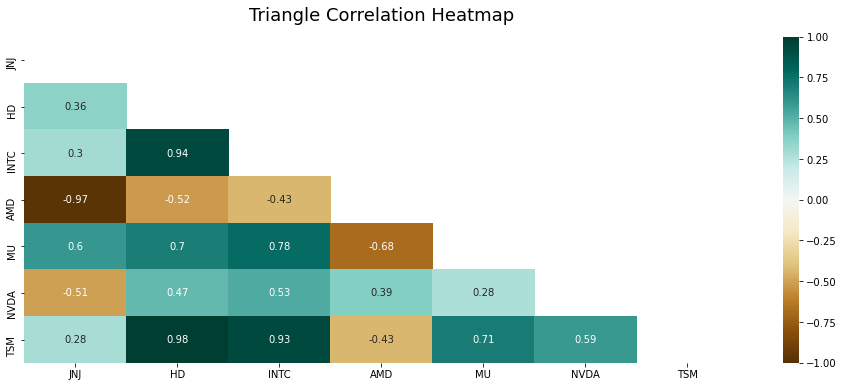

In [72]:
# Create a heatmap from the correlation values
fig = px.imshow(corr_df.corr())
fig.show()

plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(corr_df.corr(), dtype=np.bool))

heatmap = sns.heatmap(corr_df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);


### Which semiconductor stock would be the best candidate to add to the existing portfolio?

In [ ]:
# AMD would be the best candidate to add because it has the least correlation